<h3><center>Naive Bayes</center></h3>

<h5>Grupo: TechMovee</h5>
<h5>Modelo: Naive Bayes</h5>
<h5>Autor: Melissa Martins de Araujo - 2°G - n°14</h5>

<h4>Importações</h4>

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,precision_score,recall_score

import matplotlib.pyplot as plt
import seaborn as sns


<h4>Lendo a Base</h4>

In [14]:
# Carregando os dados a partir de um arquivo Excel
data = pd.read_excel('C:\\Users\\melissamartins-ieg\\OneDrive - Instituto Germinare\\Interdisciplinar\\AD_MAT3 - Interdisciplinar\\ExpansaoDados\\pesquisa_responsaveis_expandida.xlsx')

data

,Qual é a idade do(s) seu(s) filho(s)?,Qual é a distância entre sua casa e a escola?,"Quanto tempo você leva, em média, para levar seu(s) filho(s) à escola?",Você possui carro próprio?,Já fez uso do serviço de um transporte escolar para o(s) seu(s) filho(s)?,Você já teve problemas com transporte escolar?,Você estaria disposto a mudar o transporte do seu(s) filho(s) para uma van escolar que oferecesse mais segurança e eficiência?,Você tem ou já teve dificuldade para encontrar transporte escolar para o seu(s) filho(s)?,Você já teve problemas com horário e comunicação com o transportador?,Você preferiria um serviço de transporte escolar que avise automaticamente sobre atrasos e mudanças de rota?
0,6 - 10 anos,Menos de 1 km,21 - 30 minutos,Sim,Já e ainda uso,Não,Sim,Não,Não,Sim
1,6 - 10 anos,Menos de 1 km,21 - 30 minutos,Sim,Já e ainda uso,Não,Não,Sim,As vezes,Sim
2,6 - 10 anos,Menos de 1 km,Mais de 30 minutos,Sim,"Já, mas não uso mais",Sim,Sim,Sim,As vezes,Sim
3,6 - 10 anos,Menos de 1 km,10 - 20 minutos,Não,Já e ainda uso,Não,Não,Sim,Sim,Sim
4,15 - 18 anos,5 - 9 km,21 - 30 minutos,Sim,Já e ainda uso,Não,Não,Não,Não,Sim
...,...,...,...,...,...,...,...,...,...,...
295,11 - 14 anos,Mais de 10 km,Mais de 30 minutos,Não,Já e ainda uso,Não,Não,Sim,Não,Não
296,11 - 14 anos,Menos de 1 km,Menos de 10 minutos,Não,"Já, mas não uso mais",Não,Sim,Sim,As vezes,Não
297,15 - 18 anos,Mais de 10 km,Menos de 10 minutos,Sim,Já e ainda uso,Não,Sim,Sim,Não,Não
298,6 - 10 anos,Menos de 1 km,21 - 30 minutos,Não,Já e ainda uso,Não,Sim,Sim,Não,Não


In [15]:
# Imprimindo o tamanho do dataframe
tamanho = data.shape
print(f"Tamanho do dataframe expandido:\nColunas: {tamanho[1]}\nLinhas: {tamanho[0]}")

# Contando e exibindo a quantidade de classes em cada coluna
print("\nColunas e quantidade de classes de cada coluna:")
for cont, coluna in enumerate(data.columns, start=1):
    num_classes = data[coluna].nunique()
    print(f"\n{cont}° Coluna: {coluna} | Classes: {num_classes}")

Tamanho do dataframe expandido:
Colunas: 10
Linhas: 300

Colunas e quantidade de classes de cada coluna:

1° Coluna: Qual é a idade do(s) seu(s) filho(s)? | Classes: 3

2° Coluna: Qual é a distância entre sua casa e a escola? | Classes: 4

3° Coluna: Quanto tempo você leva, em média, para levar seu(s) filho(s) à escola? | Classes: 4

4° Coluna: Você possui carro próprio? | Classes: 2

5° Coluna: Já fez uso do serviço de um transporte escolar para o(s) seu(s) filho(s)? | Classes: 3

6° Coluna: Você já teve problemas com transporte escolar? | Classes: 2

7° Coluna: Você estaria disposto a mudar o transporte do seu(s) filho(s) para uma van escolar que oferecesse mais segurança e eficiência? | Classes: 2

8° Coluna: Você tem ou já teve dificuldade para encontrar transporte escolar para o seu(s) filho(s)? | Classes: 2

9° Coluna: Você já teve problemas com horário e comunicação com o transportador? | Classes: 3

10° Coluna: Você preferiria um serviço de transporte escolar que avise automati

<h4>LabelEncoder</h4>

In [16]:
# Inicializando o codificador
label_encoder = LabelEncoder()

# Codificando colunas categóricas
for col in data.columns:
    data[col] = label_encoder.fit_transform(data[col])

#print(data.head())

<h4>Verificando o balanceamento das classes</h4>

In [17]:
# Exibir o balanceamento de classes em cada coluna categórica
for col in data.columns:
    print(f"Balanceamento da coluna: {col}")
    print(f"{(data[col].value_counts(normalize=True)) * 100}\n")

Balanceamento da coluna: Qual é a idade do(s) seu(s) filho(s)?
Qual é a idade do(s) seu(s) filho(s)?
1    52.666667
0    26.666667
2    20.666667
Name: proportion, dtype: float64

Balanceamento da coluna: Qual é a distância entre sua casa e a escola?
Qual é a distância entre sua casa e a escola?
3    28.000000
1    25.333333
0    25.333333
2    21.333333
Name: proportion, dtype: float64

Balanceamento da coluna: Quanto tempo você leva, em média, para levar seu(s) filho(s) à escola?
Quanto tempo você leva, em média, para levar seu(s) filho(s) à escola?
2    41.000000
0    24.000000
1    22.333333
3    12.666667
Name: proportion, dtype: float64

Balanceamento da coluna: Você possui carro próprio?
Você possui carro próprio?
1    63.333333
0    36.666667
Name: proportion, dtype: float64

Balanceamento da coluna: Já fez uso do serviço de um transporte escolar para o(s) seu(s) filho(s)?
Já fez uso do serviço de um transporte escolar para o(s) seu(s) filho(s)?
0    49.333333
2    26.000000
1 

<h4>Separando em Atributo e Resposta</h4>

In [18]:
# Definindo as variáveis independentes (X) e dependentes (y)
X = data.drop(columns=[
    'Você preferiria um serviço de transporte escolar que avise automaticamente sobre atrasos e mudanças de rota?'
], axis=1)

y = data['Você preferiria um serviço de transporte escolar que avise automaticamente sobre atrasos e mudanças de rota?']


<h4>Separando em Treino e Teste</h4>

In [19]:
# Dividindo os dados em conjuntos de treino e teste (80% treino, 20% teste)
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

<h4>Classificador</h4>

In [21]:
# Inicializando o classificador Naive Bayes
classificador_bayes = GaussianNB()

In [22]:
# Definindo a grade de parâmetros para busca de hiperparâmetros
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Realizando a busca em grade
grid_search = GridSearchCV(estimator=classificador_bayes, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1)

# Ajustando o modelo aos dados de treinamento
grid_search.fit(X_treino, y_treino)

# Exibir os melhores parâmetros encontrados
print(f"Melhores parâmetros: {grid_search.best_params_}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Melhores parâmetros: {'var_smoothing': 1e-09}


In [23]:
# Avaliar o modelo com os melhores parâmetros
melhor_modelo = grid_search.best_estimator_

# Fazer previsões no conjunto de teste
predict = melhor_modelo.predict(X_teste)

<h3><center>Métricas</center></h3>

Acurácia: 50.0 %

Precisão: 48.28 %

Recall: 48.28 %

F1-score: 48.28 %



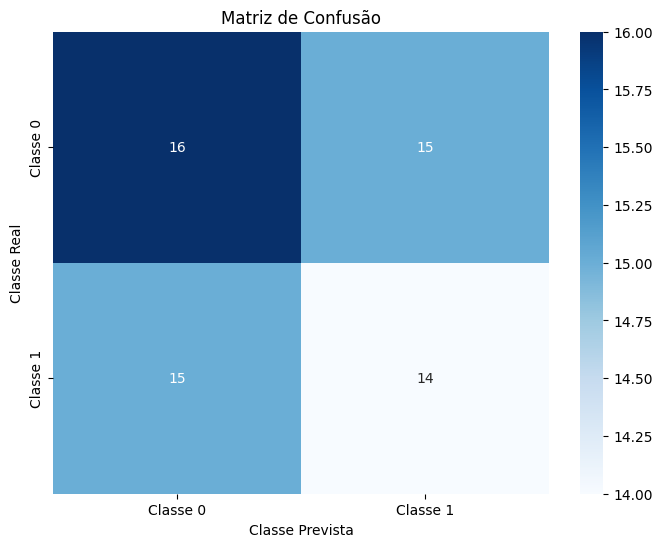

In [24]:
# Avaliando a performance do modelo
acuracia = accuracy_score(y_teste, predict)
precisao = precision_score(y_teste,predict)
recall = recall_score(y_teste,predict)
f1score = f1_score(y_teste,predict)

print(f"Acurácia: {round(acuracia * 100, 2)} %\n")
print(f"Precisão: {round(precisao * 100, 2)} %\n")
print(f"Recall: {round(recall * 100, 2)} %\n")
print(f"F1-score: {round(f1score * 100, 2)} %\n")

#Plotando matriz de confusão
matriz_confusao = confusion_matrix(y_teste, predict)

# Configurando o gráfico
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[f'Classe {i}' for i in range(matriz_confusao.shape[1])],
            yticklabels=[f'Classe {i}' for i in range(matriz_confusao.shape[0])])

# Adicionando títulos e rótulos
plt.title('Matriz de Confusão')
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.show()
